In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, TomekLinks


# Read data that is already preprocessed (feature selection, normalization, etc.)
df = pd.read_csv('../data/processed/star_classification.csv')


By displaying the distribution of the differents classes, we can see that the dataset is unbalanced. Depending on the classification algorithm we use, this could be a problem. We will try different methods of sampling.

<Axes: xlabel='class', ylabel='count'>

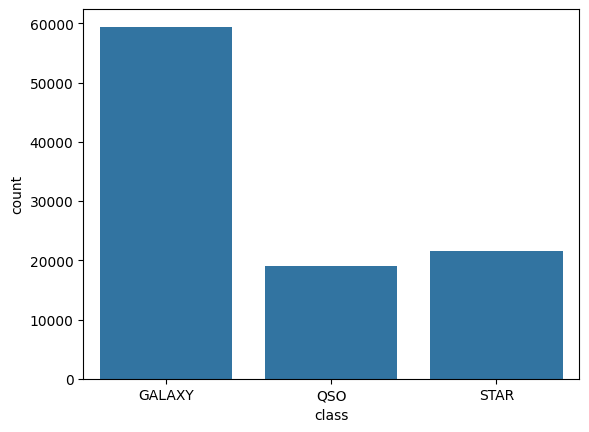

In [2]:
# Repartition of the classes without sampling methods 
sns.countplot(x='class', data=df)

In [3]:
# Prepare the data for the sampling methods
X = df.drop('class', axis=1)
y = df['class']

1. Oversampling

In [4]:
# RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X, y)

# Smote
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)

# Adasyn
ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X, y)


TypeError: '<' not supported between instances of 'str' and 'float'

In [15]:
import umap

reducer = umap.UMAP(random_state=42)

In [16]:

embedding_ros = reducer.fit_transform(X_ros)


/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [16]:
embedding_ada = reducer.fit_transform(X_ada)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [15]:
embedding_sm = reducer.fit_transform(X_sm)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [21]:
embedding_original = reducer.fit_transform(X)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


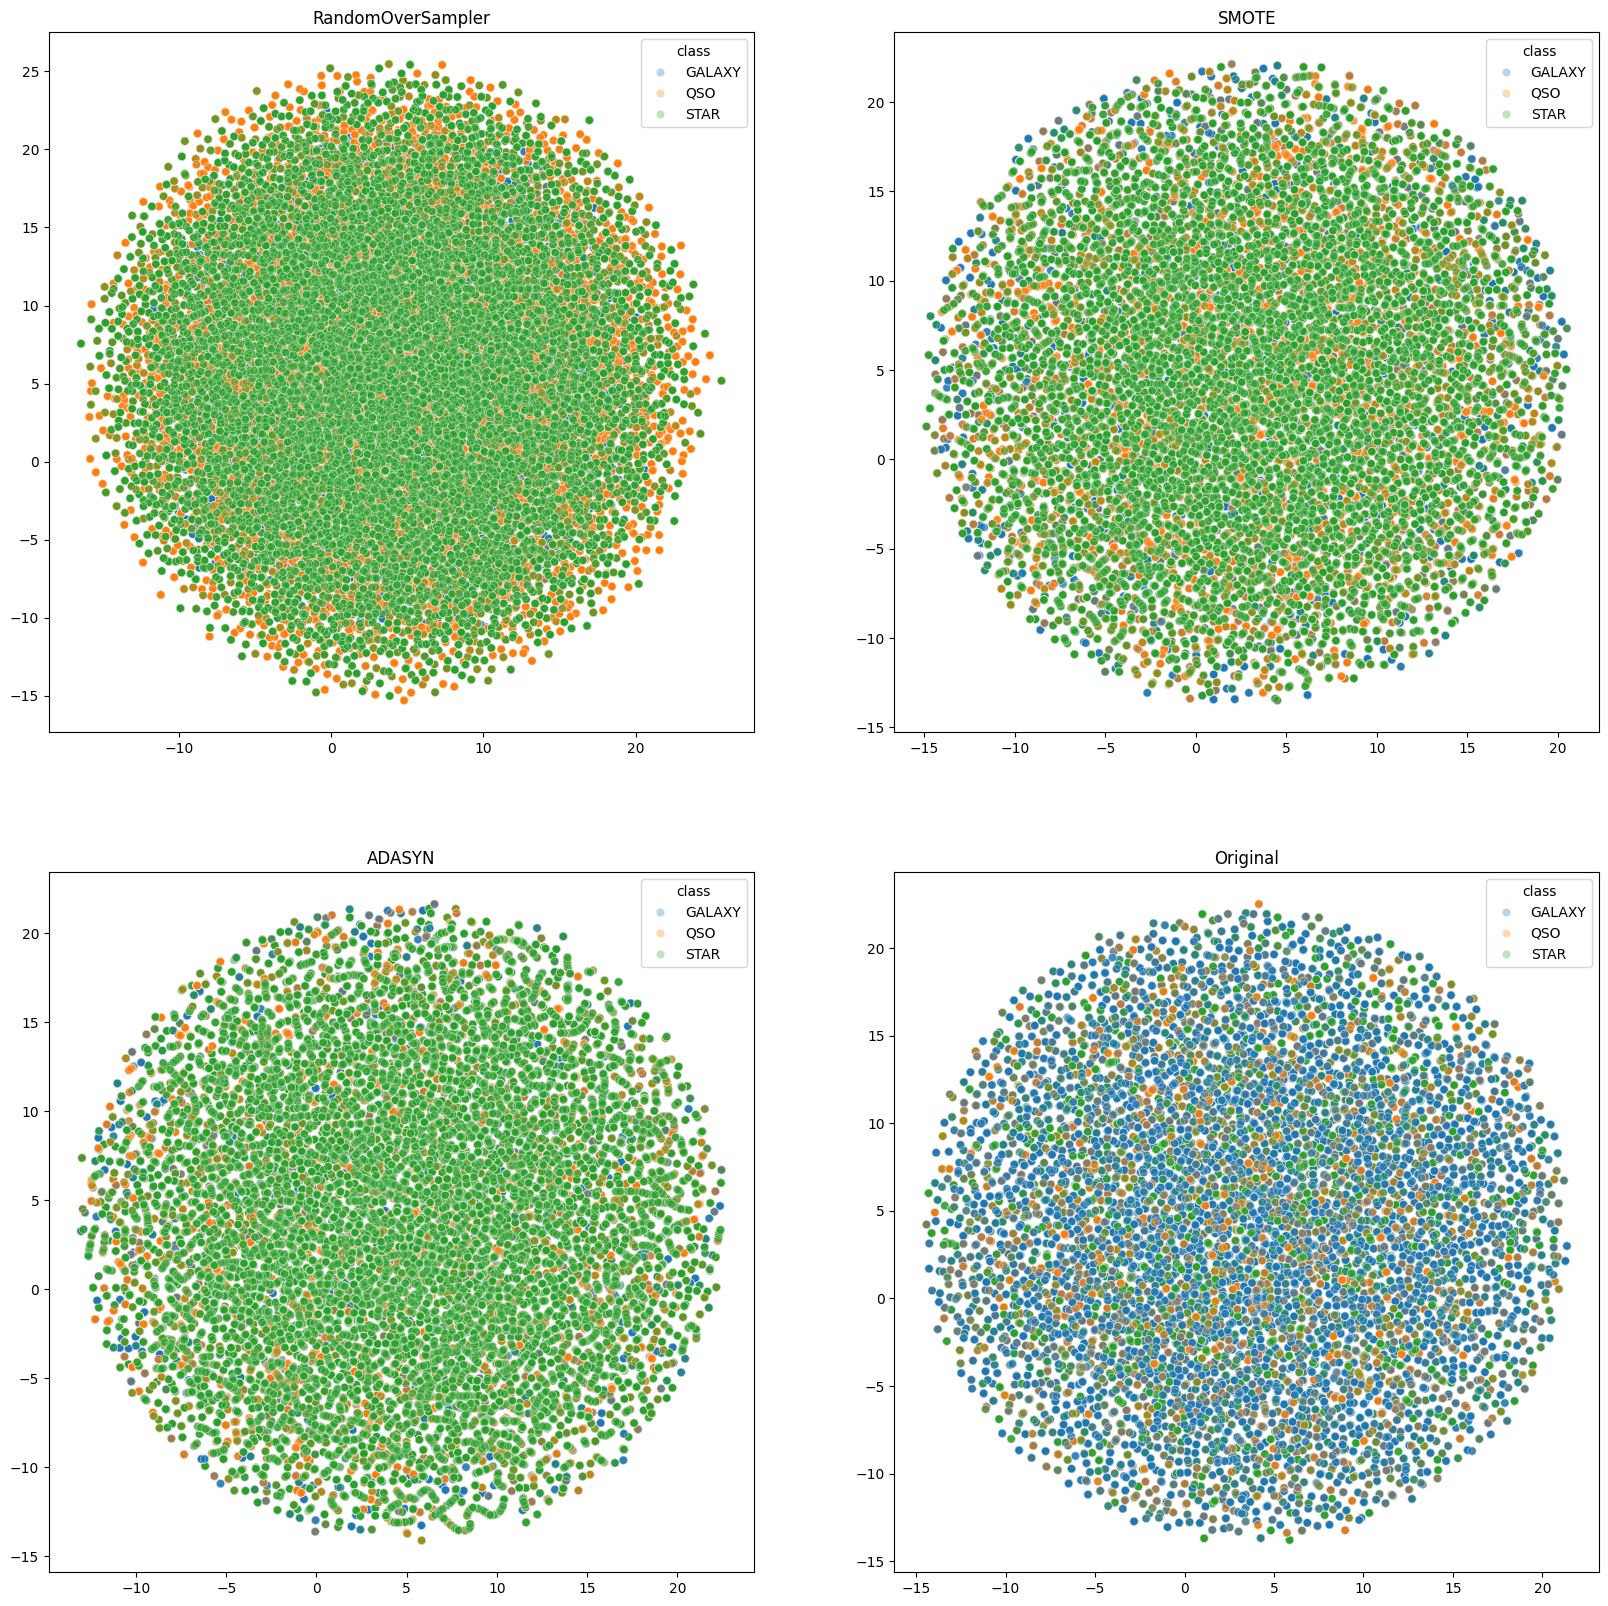

In [55]:
# Plot the UMAP representation of the data with class color

fg, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()
for i, (embed, title, y ) in enumerate(zip([embedding_ros, embedding_sm, embedding_ada, embedding_original], ['RandomOverSampler', 'SMOTE', 'ADASYN', 'Original'], [y_ros, y_sm, y_ada, df['class']])):
    sns.scatterplot(
        x=embed[:,0], y=embed[:,1],
        hue=y,
        legend='full',
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(title)

2. Undersampling

In [13]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)

cc = ClusterCentroids(random_state=0)
X_cc, y_cc = cc.fit_resample(X, y)

nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
embedding_rus = reducer.fit_transform(X_rus)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.8/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initial

In [60]:
embedding_cc = reducer.fit_transform(X_cc)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [61]:
embedding_nm = reducer.fit_transform(X_nm)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [62]:
embedding_tl = reducer.fit_transform(X_tl)

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


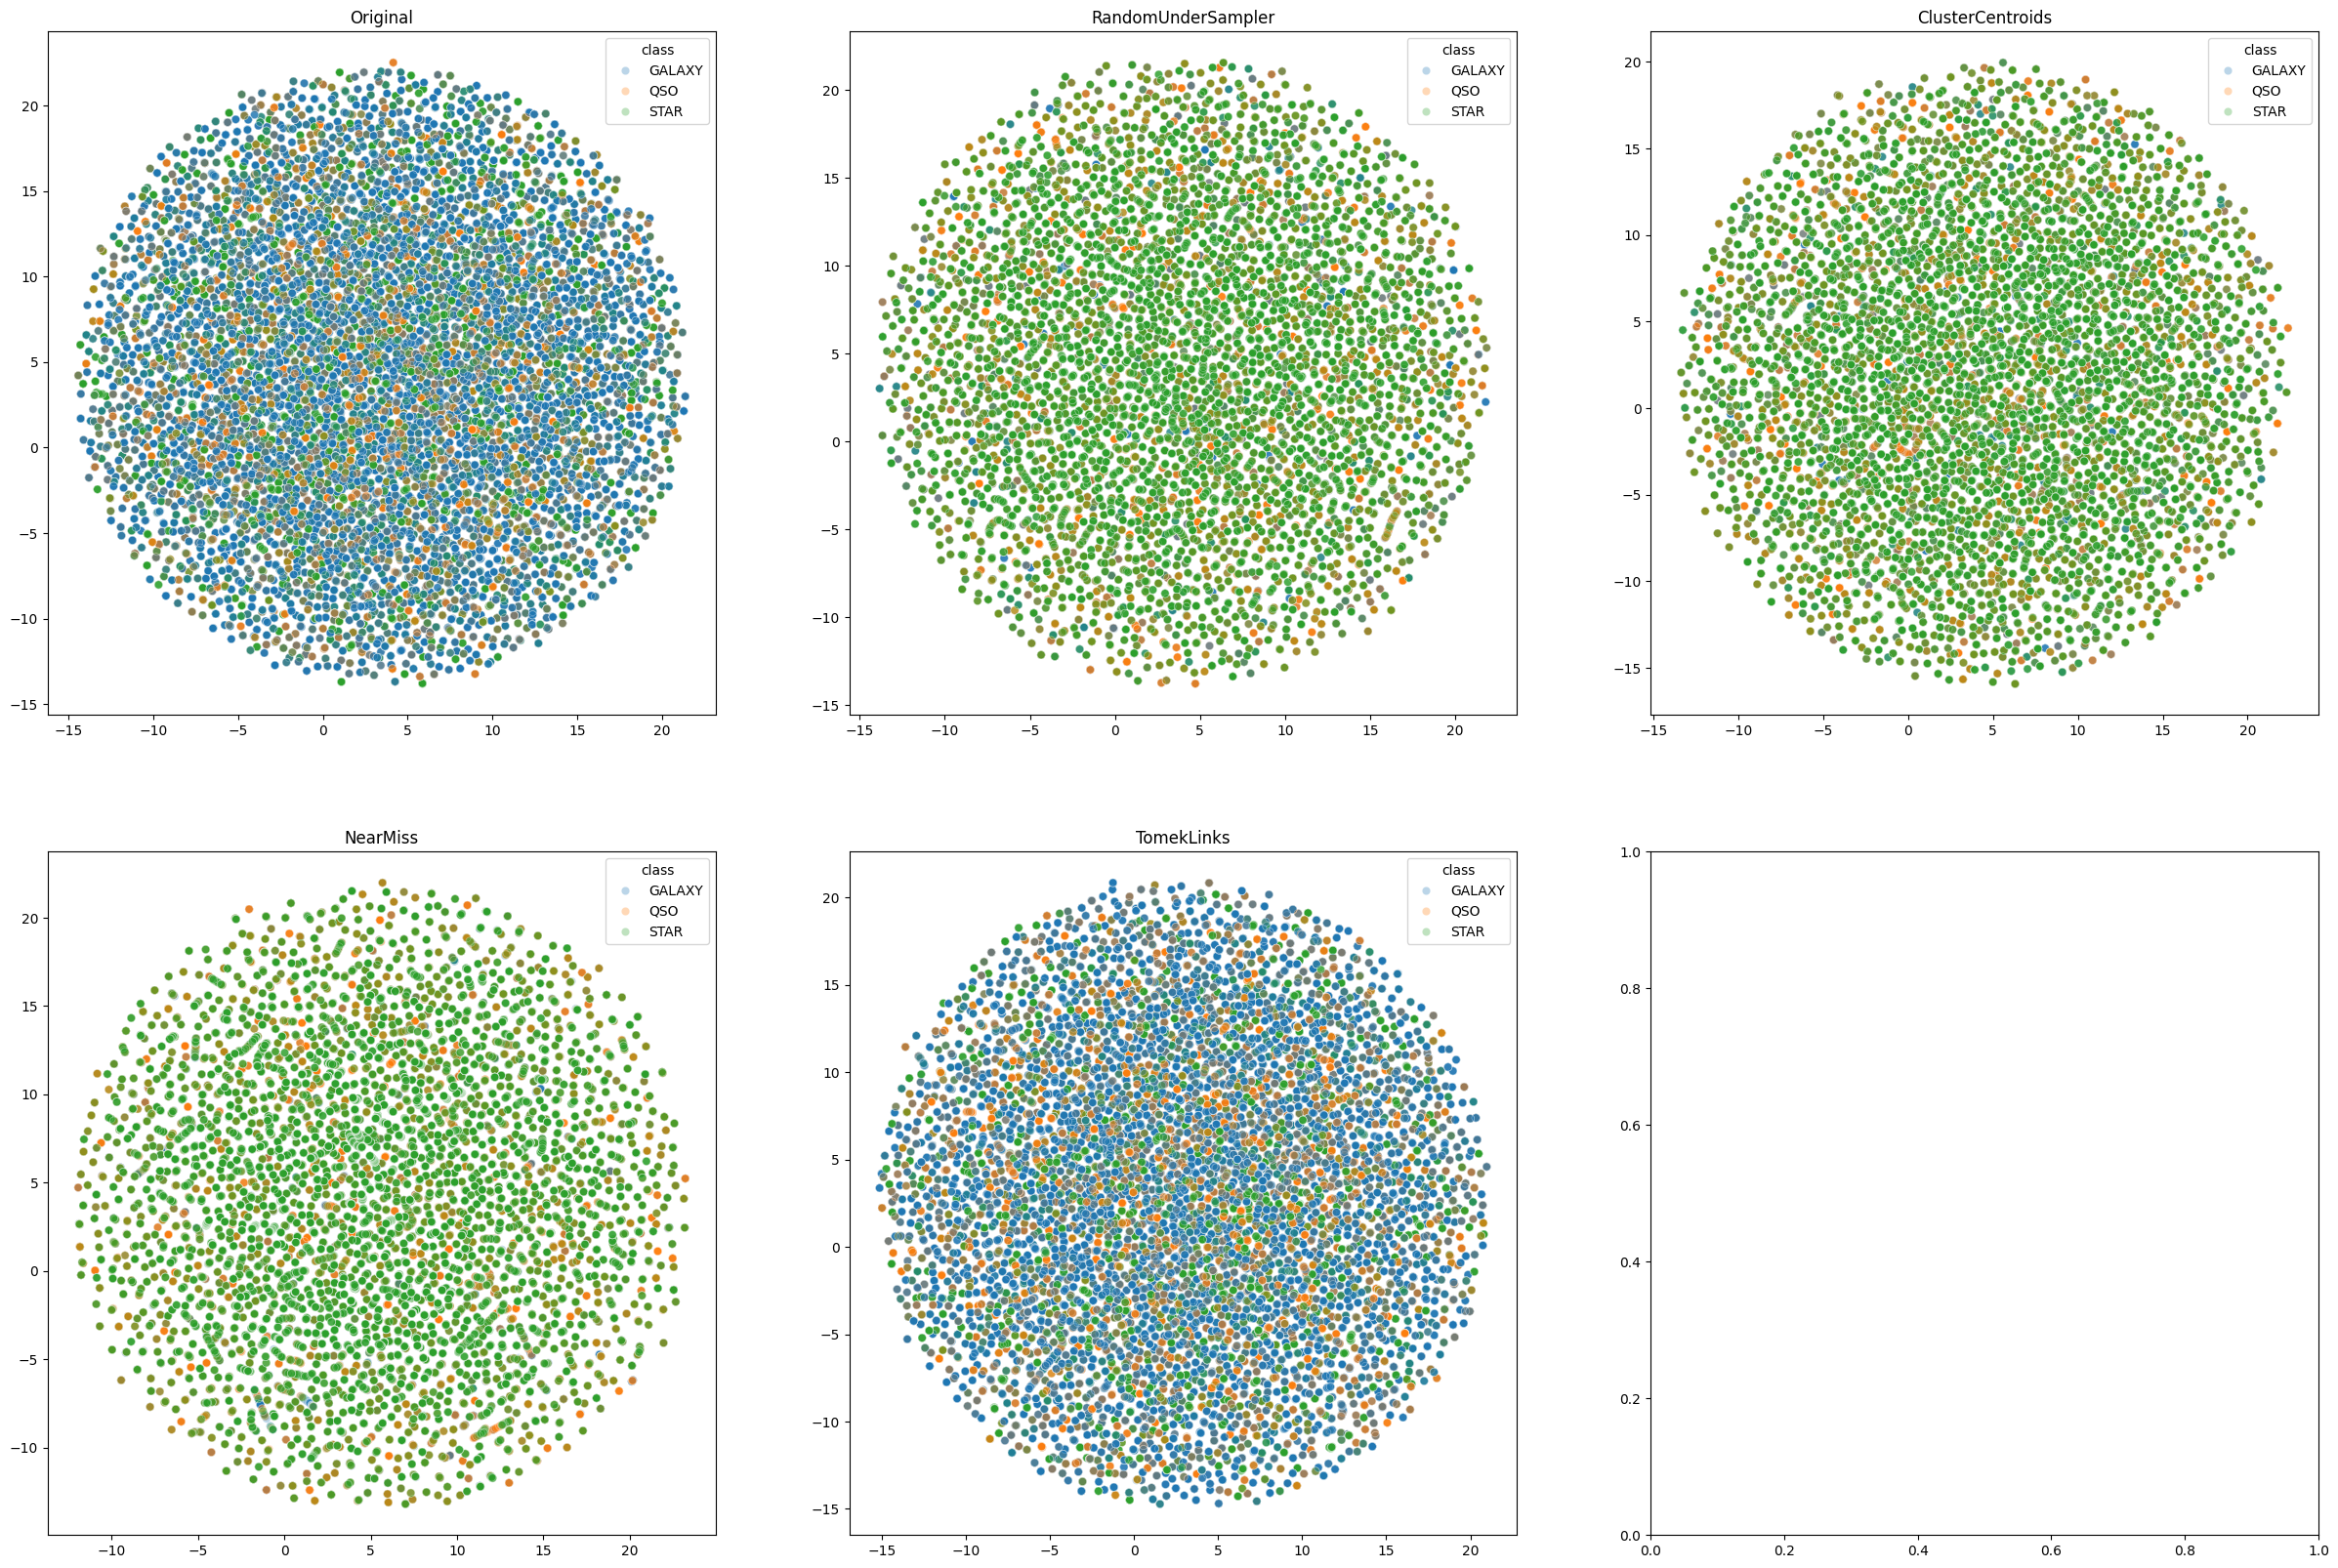

In [73]:
# Plot the UMAP representation of the data with class color

fg, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()
for i, (embed, title, y ) in enumerate(zip([embedding_original, embedding_rus, embedding_cc, embedding_nm, embedding_tl], ['Original', 'RandomUnderSampler', 'ClusterCentroids', 'NearMiss', 'TomekLinks'], [df['class'], y_rus, y_cc, y_nm, y_tl])):
    sns.scatterplot(
        x=embed[:,0], y=embed[:,1],
        hue=y,
        legend='full',
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(title)

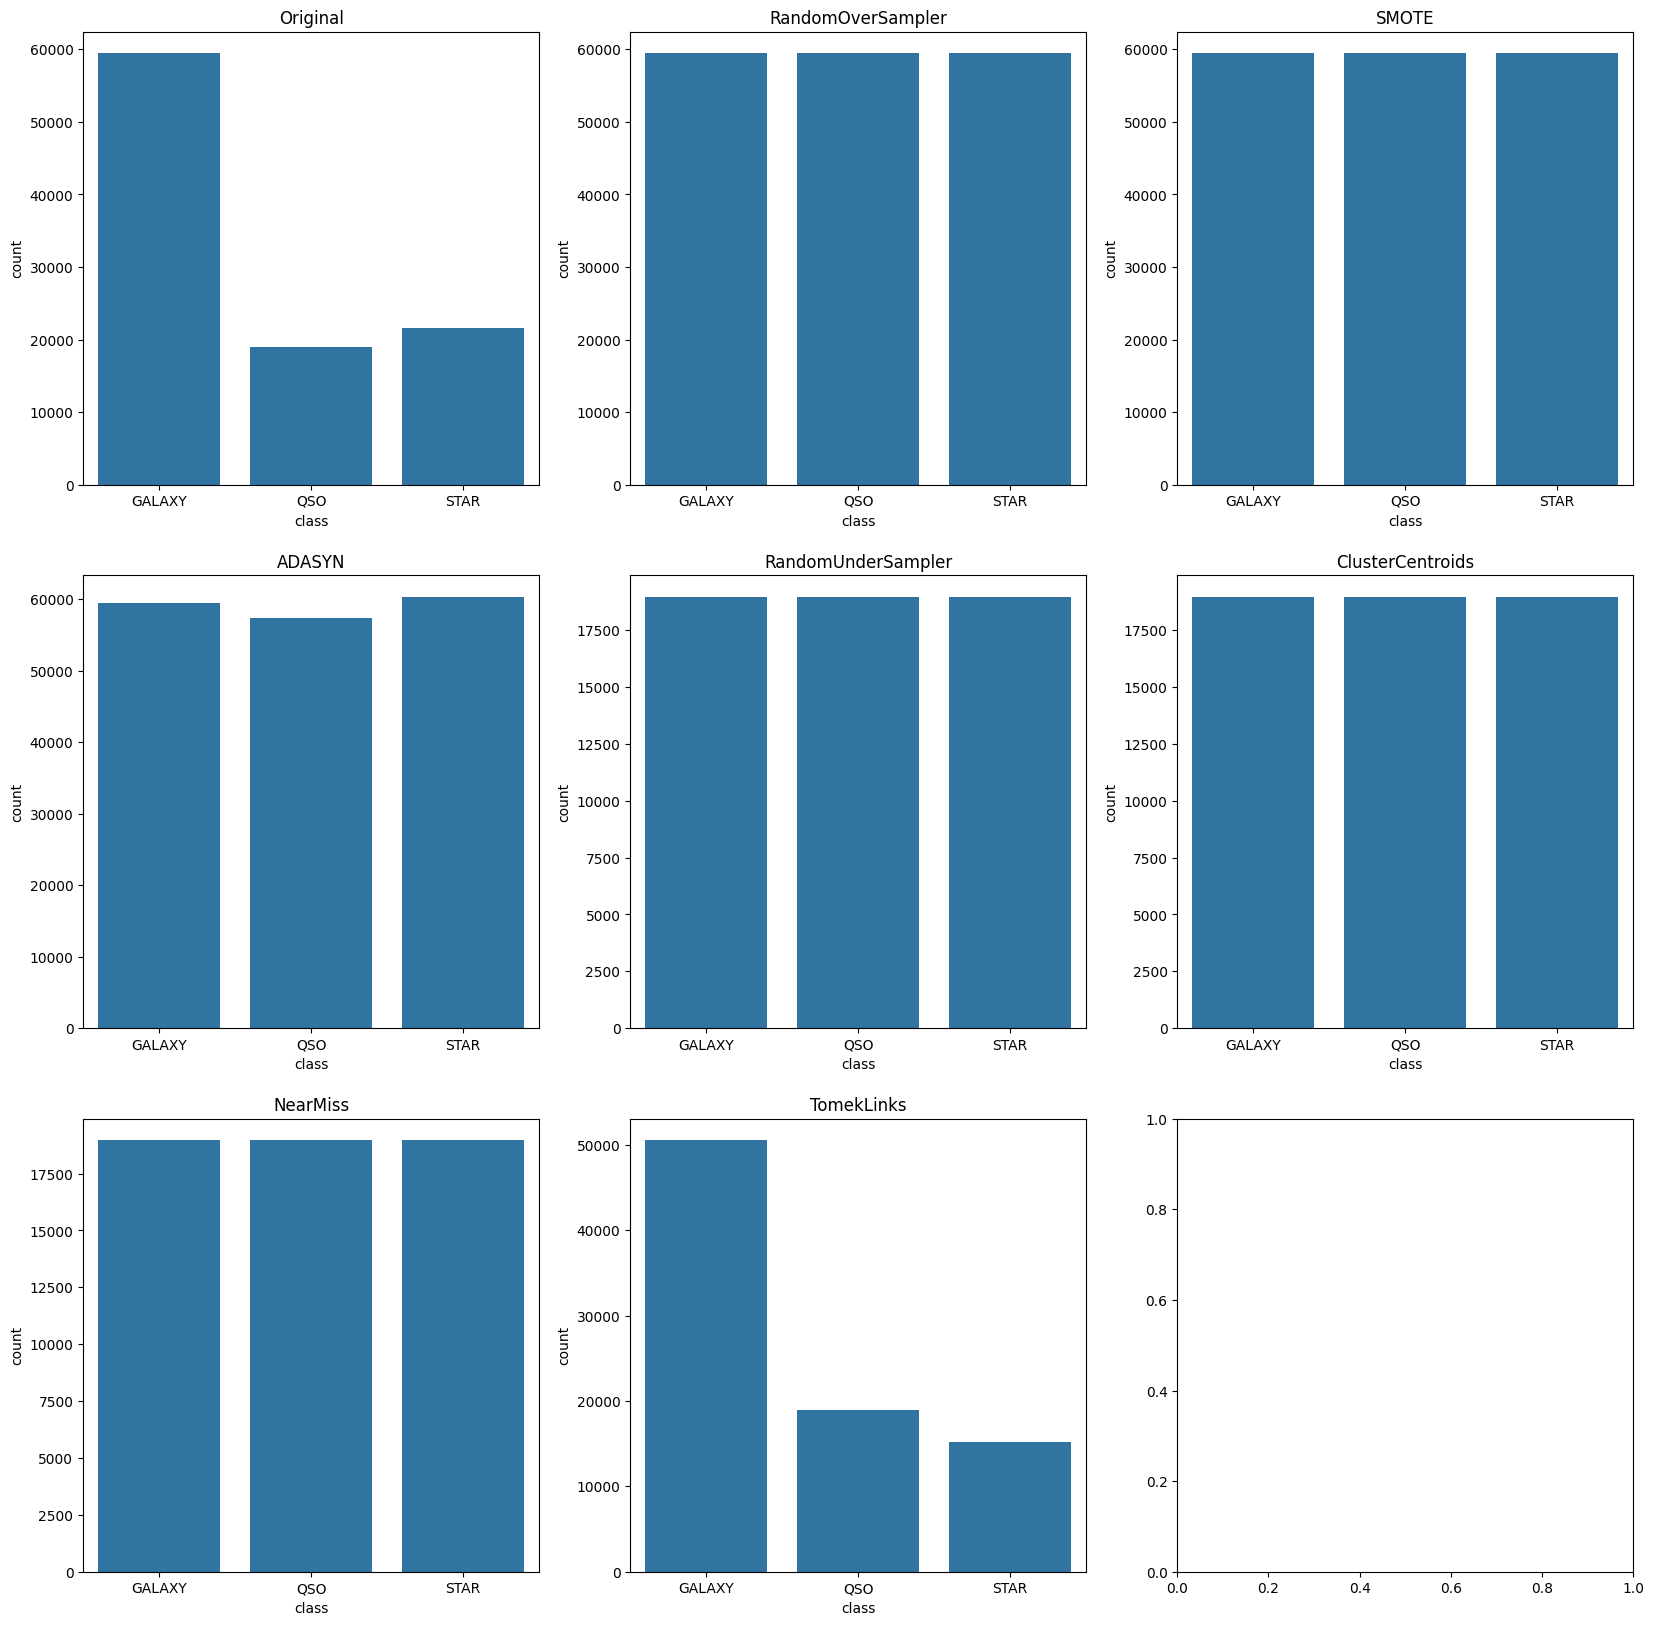

In [74]:
# display the distribution of the classes after sampling

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, (title, y) in enumerate(zip(['Original', 'RandomOverSampler', 'SMOTE', 'ADASYN', 'RandomUnderSampler', 'ClusterCentroids', 'NearMiss', 'TomekLinks'], [df['class'], y_ros, y_sm, y_ada, y_rus, y_cc, y_nm, y_tl])):
    sns.countplot(x=y, ax=axes[i])
    axes[i].set_title(title)
